## **Skills: Programming with Advanced Computer Languages**

# Predicting Long Term Credit Rating of S&P500 Companies using ML Algorithms



### December 18, 2020, University of St. Gallen


## Author: **Mahamoud Farah** 
### Student ID: **15-725-872**








## Executive Summary

In this project, I used Machine Learning Algorithms to predict company's credit rating. The ratings were predicted by several ML algorithms, who were trained using well known financial ratios. Credit Rating agencies such as Moody's or Standard & Poor's also use financial ratios of a company to give them a credit rating. Obviously, the exact models these companies use are not known. In reality, they most likely use more than just financial ratios by including macroeconomic data or other data "unknown" to the public. 

I used a dataset that contains credit ratings of over 400 companies listed on the S&P500 (US stock index containing the 500 largest US companies listed on the New York Stock Exchange (NYSE)). As we know, companies receive a credit rating from rating agencies in order to signal potential investors the financial health of a company. These ratings are crucial for Banks and Investors who might want to issue loans or buy the company's bonds. 

The dataset contains the ratings and financial ratios. The ratios are **liquidity** based ratios (current ratios, cash ratio, etc.), **profitability** ratios (gross profit margin, return on assets, etc.), **debt** ratios and **cash flow** ratios. These are mostly ratios that can be fetched from the annual (quarterly) reports of the companies. The data was from Wharton Research Data Services (WRDS). 

The goal of this project is to train various machine learning algorthms to predict the long term credit rating of a company. In a fist step, the data set will be analyzed. Then, the ML algorithms will be trained and lastly, a conclusion will be drawn.

I mainly followed this [tutorial](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/). Futhermore, I gained more knowledge from the book "**Python  Machine Learning - Unlock deeper insights into machine learning withs this vital guide to cutting.edge predictive analytics**", written by Sebastian Saschka (2015)

The **XGB classifier**, which is a tree based model, provided the best result. 



# Content

## 1. Data
## 2. Training the Algorithms
## 3. Results

# 1. Data 
_____________________________________________________________________________________________________________________________

As mentioned, the dataset was fetched from Wharton Research Database. It contains the ratings (AAA, AA etc.) and financial ratios. The ratios will later be used in order to predict the rating. 

The data also contains the ratings of the company. The ratings are in letter, where the ratings are in accordance with the ratings of Standard and Poor's (see image, middle column). AAA is the highest/best rating a company can receive and C is the lowest. D means a company has defaulted. The goal of this project is the predict these ratings with financial ratios.

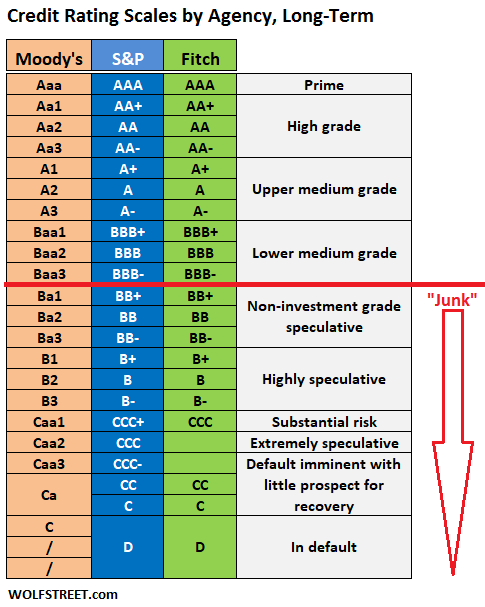

Let's load the data and see what's in there.

In [13]:
#load the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data from my github account
url = 'https://raw.githubusercontent.com/mfarah10/credit-rating/main/SP500.txt'
data = pd.read_csv(url, sep = ',')

Lets look at the head of the data. The data contains 33 features (expect rating column (called splticrm) and permno, cusip etc. which are just company specific coded.

In [3]:
data.head()

,permno,cusip,Ticker,adate,qdate,public_date,splticrm,bm,ps,pcf,...,dltt_be,debt_assets,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing
0,10104,68389X10,ORCL,31/05/2009,30/11/2009,31/01/2010,A,0.252,4.976,13.353,...,0.451,0.485,0.338,0.949,1.875,2.409,2.409,0.466,4.145,1.045
1,10104,68389X10,ORCL,31/05/2009,30/11/2009,28/02/2010,A,0.252,5.323,14.285,...,0.451,0.485,0.338,0.949,1.875,2.409,2.409,0.466,4.434,1.117
2,10104,68389X10,ORCL,31/05/2009,30/11/2009,31/03/2010,A,0.252,5.556,14.911,...,0.451,0.485,0.338,0.949,1.875,2.409,2.409,0.466,4.628,1.165
3,10104,68389X10,ORCL,31/05/2009,28/02/2010,30/04/2010,A,0.233,5.381,15.909,...,0.443,0.493,0.346,0.982,1.739,2.237,2.245,0.453,4.515,1.545
4,10104,68389X10,ORCL,31/05/2009,28/02/2010,31/05/2010,A,0.233,4.692,13.871,...,0.443,0.493,0.346,0.982,1.739,2.237,2.245,0.453,3.937,1.348


Next, let's see what we are dealing with here. **splticrm** is the long-term rating. This will by the variable I want to predict with the models. The other features are financial ratios. WRDS has over 70 features that are grouped into the following

1. ***Capitalization***: measures debt component of a firm's capital structure
2. ***Efficiency***: captures the efefctiveness of firm's usage of assets and liability, e.g: Inventory Turnover
3. ***Financial Soundness/Solvency***: measures the firm's ability to meet long-term obligations, e.g: Interest Coverage Ratio
4. ***Liquidity***: measures a firm's ability to meet its short-term obligations, e.g.: Current-Ratio
5. ***Profitability***: measures the ability of a firm to geneate profit, e.g. return on assets, Gross Profit Margin
6. ***Valuation***:estimates attractiveness of a stok for investors, e.g.: P/E ratio
7. ***Others***: 

The dataset does not include all ratios, as 70 features seems to be a bit of an overkill.  

(permno, cusip, Ticker etc. are just company specific names. They will be dropped later. The only thing interesting is **splticrm** and the financial ratios). 

In [4]:
#show the columns
print(data.columns)

Index(['permno', 'cusip', 'Ticker', 'adate', 'qdate', 'public_date',
       'splticrm', 'bm', 'ps', 'pcf', 'dpr', 'npm', 'gpm', 'cfm', 'roa', 'roe',
       'roce', 'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap',
       'capital_ratio', 'int_debt', 'int_totdebt', 'debt_ebitda', 'short_debt',
       'lt_debt', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'dltt_be', 'debt_assets',
       'debt_capital', 'de_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio',
       'at_turn', 'ptb', 'PEG_trailing'],
      dtype='object')


As we can see, the data contains 33 financial ratios. Find below a summary of the ratios grouped by their category.

### 1. Capitalization
**Capitalization ratio**: capital_ratio

**Commonn Equity / Invested Capital**: equity_invcap

**Long-term Debt / Invested Capital**: debt_invcap

**Total Debt / Invested Capital**: totdebt_invcap

### 2. Efficiency
**Asset Turnover**: at_turn

### 3. Financial Soundness
**Free Cash Flow / Operating Cash Flow**: fcf_ocf

**Operating Cash Flow / Current Liabilities**: ocf_lct

**Cash Flow / Total Debt**: cash_debt

**Cash Flow Margin**: cfm

**Short-Term Debt / Total Debt**: short_debt

**Total Debt / EBITDA**: debt_ebitda

**Long-term Debt / Book Equity**: dltt_be

**Interest / Average Long-term Debt**: int_debt

**Interest / Average Total Debt**:  int_totdebt

**Long-term Debt / Total Liabilities**: lt_debt

### 4. Liquidity
**Cash Ratio**: cash_ratio

**Current Ratio**: curr_ratio

**Quick Ratio**: quick_ratio

### 5. Profitability
**Gross Profit / Total Assets**: GProf

**Gross Profit Margin**: gpm

**Net Profit Margin**: npm

**Return on Assets**: roa

**Return on Capital Employed**: roce

**Return on Equity**: roe

### 6. Solvency
**Total Debt / Equity**: de_ratio

**Total Debt / Total Assets**: debt_assets

**Total Debt / Capital**: debt_capital

### 7. Valuation
**Dividend Payout Ratio**: dpr

**Trailing P/E to Growth (PEG) ratio**: PEG_trailing

**Book / Market**: bm

**Price /Cash flow**: pcf

**Price / Sales**: ps

**Price/Book**: ptb


In [5]:
# let's see the shape of the dataset
data.shape

(30119, 40)

Over 30'000 observations and 40 variables (some will be deleted). Nevertheless, the algorithms will happy with that.

I could simply drop all rows containing missin value with the **.dropna** function. This would have the disadvantage that we might lose valuable infomation if I simply drop these rows.

Another method is replacing the missing cells with values that make sense. These values could for example be the mean of the column or the median. This method is called **Imputing missing values**. Instead of simply dropping rows, I will use this interpolation technique (later).

In [6]:
#display the structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30119 entries, 0 to 30118
Data columns (total 40 columns):
permno            30119 non-null int64
cusip             30119 non-null object
Ticker            30119 non-null object
adate             30109 non-null object
qdate             30119 non-null object
public_date       30119 non-null object
splticrm          30119 non-null object
bm                29448 non-null float64
ps                30110 non-null float64
pcf               30086 non-null float64
dpr               28508 non-null float64
npm               30110 non-null float64
gpm               30110 non-null float64
cfm               30012 non-null float64
roa               30086 non-null float64
roe               29431 non-null float64
roce              30023 non-null float64
GProf             30110 non-null float64
equity_invcap     30106 non-null float64
debt_invcap       30074 non-null float64
totdebt_invcap    30056 non-null float64
capital_ratio     30078 non-null float

In [7]:
#This returns the numbers of missing values per columns.
data.isnull().sum()

permno                0
cusip                 0
Ticker                0
adate                10
qdate                 0
public_date           0
splticrm              0
bm                  671
ps                    9
pcf                  33
dpr                1611
npm                   9
gpm                   9
cfm                 107
roa                  33
roe                 688
roce                 96
GProf                 9
equity_invcap        13
debt_invcap          45
totdebt_invcap       63
capital_ratio        41
int_debt           2313
int_totdebt        2276
debt_ebitda         145
short_debt          256
lt_debt              41
ocf_lct            4967
cash_debt           153
fcf_ocf             471
dltt_be             654
debt_assets          20
debt_capital        279
de_ratio             20
cash_ratio         4952
quick_ratio        4952
curr_ratio         4952
at_turn              33
ptb                 671
PEG_trailing      10626
dtype: int64

I will drop some columns as they contain too many missing values.
The others will be dealt with later.

In [8]:
#drop columns with number of missing values above 4000
data_new = data[data.columns[data.isnull().sum() < 4000]]

#drop all non-financial features
data_new = data_new.drop(['permno', 'cusip', 'Ticker', 'adate', 'qdate', 'public_date'], axis = 1)

#let's see result
data_new.isnull().sum()

splticrm             0
bm                 671
ps                   9
pcf                 33
dpr               1611
npm                  9
gpm                  9
cfm                107
roa                 33
roe                688
roce                96
GProf                9
equity_invcap       13
debt_invcap         45
totdebt_invcap      63
capital_ratio       41
int_debt          2313
int_totdebt       2276
debt_ebitda        145
short_debt         256
lt_debt             41
cash_debt          153
fcf_ocf            471
dltt_be            654
debt_assets         20
debt_capital       279
de_ratio            20
at_turn             33
ptb                671
dtype: int64

The remaining missing values will be dealt with with the **Imputer** function (later). 

Let's see how many unique ratings we have.

In [9]:
data_new.splticrm.value_counts()

BBB     5649
BBB+    4831
A-      3955
A       3797
BBB-    3322
A+      1943
BB+     1648
BB      1096
BB-     1069
AA-      990
AA       489
B+       410
AAA      296
B        226
AA+      199
B-       143
CCC+      50
D          4
CCC        2
Name: splticrm, dtype: int64

The CCC rating only happens twice. D, which corresponds to defaulted company, happens four times as well. 

I'll drop them. The rest is good to go.

In [10]:
#drop rows with 'CCC' and 'D'
data_new = data_new[data_new['splticrm'] != 'CCC']
data_new = data_new[data_new['splticrm'] != 'D']
data_new

,splticrm,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,...,short_debt,lt_debt,cash_debt,fcf_ocf,dltt_be,debt_assets,debt_capital,de_ratio,at_turn,ptb
0,A,0.252,4.976,13.353,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.145
1,A,0.252,5.323,14.285,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.434
2,A,0.252,5.556,14.911,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.628
3,A,0.233,5.381,15.909,0.177,0.234,0.816,0.322,0.227,0.218,...,0.130,0.458,0.37,0.976,0.443,0.493,0.346,0.982,0.453,4.515
4,A,0.233,4.692,13.871,0.177,0.234,0.816,0.322,0.227,0.218,...,0.130,0.458,0.37,0.976,0.443,0.493,0.346,0.982,0.453,3.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30114,BBB+,0.050,7.678,20.724,0.349,0.318,0.713,0.389,0.998,0.846,...,NaN,0.000,1.96,0.815,0.000,0.332,0.035,0.508,1.734,19.471
30115,BBB+,0.050,7.483,20.200,0.349,0.318,0.713,0.389,0.998,0.846,...,NaN,0.000,1.96,0.815,0.000,0.332,0.035,0.508,1.734,18.978
30116,BBB+,0.056,8.541,24.861,0.406,0.291,0.702,0.362,0.897,0.720,...,NaN,0.000,1.96,0.783,0.000,0.324,0.036,0.496,1.612,18.964
30117,BBB+,0.056,9.159,26.662,0.406,0.291,0.702,0.362,0.897,0.720,...,NaN,0.000,1.96,0.783,0.000,0.324,0.036,0.496,1.612,20.338


### Summary
The final dataset contains over 30'000 observations and 28 features (29-1). 

In the next chapter, I will apply the **Imputer** function. Next, I will split the dataset into training and test data. And lastly, I will train the models. Let's go!

# 2. Training the Algorithms

I will splitt the data set into a feature Matrix **X**, containing the feautures aka the explanatory variables and into a vector **y** (response variable). Later, X and y will be splitt into training sets and test sets. The training sets are used to train the ML algortihms, the test sets are used to test the fitted model.

But before doing that,Ie need to address the issue with the missing values (called **NaN** in this dataset).The ML algorithms won't work with them. 

I could simply drop all rows containing missing value with the **.dropna** function. This would have the disadvantage that we might lose valuable infomation if I simply drop these rows.

Another method is replacing the missing cells with values that make sense. These values could for example be the mean of the column or the median. This method is called **Imputing missing values**. Instead of simply dropping rows, I use this interpolation technique (**Imputer** function from sklearn). 

But before doing that, I will have to transform the ratings in **splticrm** (AAA, AA etc.) from strings to numerical values, since the **Imputer** function cannot work with strings (yet). For that, I will use pandas ***pd.factorize*** to transform these values.

*Note that this function will let python assume that there is an order in the ratings (for example A>CC>AAA or Zurich > St.Gallen (which is kind of true for btw, but Python doesn't need to know :-)). 
But this would only be a problem if I categorized a feauture column. However, it doens't matter for the response **y vector**, as the ML algorithm won't treat it as ordinal. So we're good to go.*

In [11]:
#factorize the rating column 'splticrm', so that we have numerical values instead of strings
data_new['splticrm'] = pd.factorize(data_new.splticrm)[0]
data_new

,splticrm,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,...,short_debt,lt_debt,cash_debt,fcf_ocf,dltt_be,debt_assets,debt_capital,de_ratio,at_turn,ptb
0,0,0.252,4.976,13.353,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.145
1,0,0.252,5.323,14.285,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.434
2,0,0.252,5.556,14.911,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.628
3,0,0.233,5.381,15.909,0.177,0.234,0.816,0.322,0.227,0.218,...,0.130,0.458,0.37,0.976,0.443,0.493,0.346,0.982,0.453,4.515
4,0,0.233,4.692,13.871,0.177,0.234,0.816,0.322,0.227,0.218,...,0.130,0.458,0.37,0.976,0.443,0.493,0.346,0.982,0.453,3.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30114,8,0.050,7.678,20.724,0.349,0.318,0.713,0.389,0.998,0.846,...,NaN,0.000,1.96,0.815,0.000,0.332,0.035,0.508,1.734,19.471
30115,8,0.050,7.483,20.200,0.349,0.318,0.713,0.389,0.998,0.846,...,NaN,0.000,1.96,0.815,0.000,0.332,0.035,0.508,1.734,18.978
30116,8,0.056,8.541,24.861,0.406,0.291,0.702,0.362,0.897,0.720,...,NaN,0.000,1.96,0.783,0.000,0.324,0.036,0.496,1.612,18.964
30117,8,0.056,9.159,26.662,0.406,0.291,0.702,0.362,0.897,0.720,...,NaN,0.000,1.96,0.783,0.000,0.324,0.036,0.496,1.612,20.338


The response column has been transformed and now contains numerical values.

Let's deal with the missing values in this dataset with **Imputer** function. I will replace the missing cells with the median of the column. I choose median, because the mean could be heavily affected by outliers. The median is thus more robust.

In [14]:
#load the package needed
from sklearn.preprocessing import Imputer

#this will replace the 'NaN' in a cell with the median of the column', I chose median because it won't be affected by outliers.
imr = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imr.fit(data_new)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [15]:
#need the name of the columns, as Imputer will transform the dataset into np.array, 
#so I need to transform it back into pd.DataFrame using the names as column indexes.
columns_ = data_new.columns.values
print(columns_)

['splticrm' 'bm' 'ps' 'pcf' 'dpr' 'npm' 'gpm' 'cfm' 'roa' 'roe' 'roce'
 'GProf' 'equity_invcap' 'debt_invcap' 'totdebt_invcap' 'capital_ratio'
 'int_debt' 'int_totdebt' 'debt_ebitda' 'short_debt' 'lt_debt' 'cash_debt'
 'fcf_ocf' 'dltt_be' 'debt_assets' 'debt_capital' 'de_ratio' 'at_turn'
 'ptb']


In [16]:
#execute Imputer and transform data back to a DataFrame
data_final = imr.transform(data_new.values)
data_final = pd.DataFrame(data_final, columns = columns_)
data_final

,splticrm,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,...,short_debt,lt_debt,cash_debt,fcf_ocf,dltt_be,debt_assets,debt_capital,de_ratio,at_turn,ptb
0,0.0,0.252,4.976,13.353,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.145
1,0.0,0.252,5.323,14.285,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.434
2,0.0,0.252,5.556,14.911,0.129,0.250,0.822,0.337,0.232,0.232,...,0.079,0.486,0.37,0.973,0.451,0.485,0.338,0.949,0.466,4.628
3,0.0,0.233,5.381,15.909,0.177,0.234,0.816,0.322,0.227,0.218,...,0.130,0.458,0.37,0.976,0.443,0.493,0.346,0.982,0.453,4.515
4,0.0,0.233,4.692,13.871,0.177,0.234,0.816,0.322,0.227,0.218,...,0.130,0.458,0.37,0.976,0.443,0.493,0.346,0.982,0.453,3.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30108,8.0,0.050,7.678,20.724,0.349,0.318,0.713,0.389,0.998,0.846,...,0.087,0.000,1.96,0.815,0.000,0.332,0.035,0.508,1.734,19.471
30109,8.0,0.050,7.483,20.200,0.349,0.318,0.713,0.389,0.998,0.846,...,0.087,0.000,1.96,0.815,0.000,0.332,0.035,0.508,1.734,18.978
30110,8.0,0.056,8.541,24.861,0.406,0.291,0.702,0.362,0.897,0.720,...,0.087,0.000,1.96,0.783,0.000,0.324,0.036,0.496,1.612,18.964
30111,8.0,0.056,9.159,26.662,0.406,0.291,0.702,0.362,0.897,0.720,...,0.087,0.000,1.96,0.783,0.000,0.324,0.036,0.496,1.612,20.338


I have successfully dealt with the missing values. Next, I'm creating the feature matrix **X** and response vector **y**

In [17]:
#create feature Matrix X that only contains the financial ratios
X = data_final.iloc[:, 1:]
X.shape

(30113, 28)

In [18]:
#check if there are really no missing values
X.isnull().sum()

bm                0
ps                0
pcf               0
dpr               0
npm               0
gpm               0
cfm               0
roa               0
roe               0
roce              0
GProf             0
equity_invcap     0
debt_invcap       0
totdebt_invcap    0
capital_ratio     0
int_debt          0
int_totdebt       0
debt_ebitda       0
short_debt        0
lt_debt           0
cash_debt         0
fcf_ocf           0
dltt_be           0
debt_assets       0
debt_capital      0
de_ratio          0
at_turn           0
ptb               0
dtype: int64

In [19]:
#create response vector y
y = data_final.iloc[:,0]
y.shape

(30113,)

The X and y sets have been created. Next thing I need to do, is to split them into training and test sets. The training set will be used to train the algorithm, and the test sets are used to evaluate the fitted models. The Training to Test Ratio is 80:20. Other ratios are possible as well, but this ratio is used quite frequently.

In [20]:
#import train_test_split package from skelearn
from sklearn.model_selection import train_test_split

In [21]:
#split the X and y into training and test sets;
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y )

## Fitting the models
Now it's time to use the algorithms. The Test and training scores will be presented right after each model. At the end, there will be a summary of the results.

### Random Forrest

This is a tree based model, so the features won't need to be scaled first (same with Decision Tree and XGBoost later)

In [22]:
#load packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [25]:
print('Train Score: ', forest.score(X_train, y_train))
print('Test Score: ', forest.score(X_test, y_test))

Train Score:  0.9975508509755086
Test Score:  0.9707786817200731


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

#max_depth = number of features
tree = DecisionTreeClassifier(max_depth=28)
tree.fit(X_train, y_train)

#print the train and text scores
print('Train Score: ', tree.score(X_train, y_train))
print('Test Score: ', tree.score(X_test, y_test))

Train Score:  1.0
Test Score:  0.957994354972605


### Support Vector Machine

This model needs scaled features. This will be done with the function **StandardScaler**

In [27]:
#load the scaler and apply it to training / test set. (only on X!)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)

In [28]:
#import model 
from sklearn.svm import SVC


svm_rbf = SVC(kernel='rbf', C =100)
svm_rbf.fit(X_train_std, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
print('Train Score: ', svm_rbf.score(X_train_std, y_train))
print('Test Score: ', svm_rbf.score(X_test_std, y_test))

Train Score:  0.8987131589871316
Test Score:  0.8796280923128009


### XGBoost

In [30]:
#import model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
print('Train Score: ', xgb.score(X_train, y_train))
print('Test Score: ', xgb.score(X_test, y_test))

Train Score:  0.9975923619759236
Test Score:  0.9727710443300681


### K-Nearest Neighbors (KNN)

One crucial parameters in the k-nearest Neighbors algorithms is k, the number of nearest neighbors. As there is no statistical methods to define the optimal k value, I will define a range and let Python decide which k is optimal.

In [32]:
#import model and MinMaxScaler to scale the feautures. Works similar to StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

#create object and scale the data (only features)
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

Let's find the optimal number of neighbors for our model. I used the tutorial from this [website](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb) 

In [33]:
#create a plot to see for which k the error rate of the model is the minimum
#will take some time
error_rate = []
for i in range(4,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_norm, y_train)
    pred_i = knn.predict(X_test_norm)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

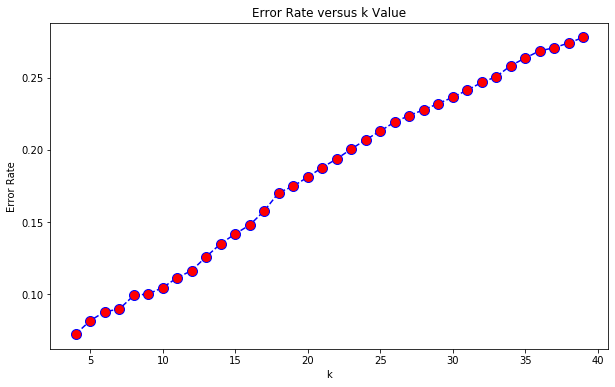

In [34]:
#plot the error rate against the k's
plt.figure(figsize=(10,6))
plt.plot(range(4,40), error_rate, color = 'blue', linestyle = 'dashed', 
        marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error Rate versus k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

We see the error rate increases with k. 

Let's do the same again, but for accuracy vs k-Value

In [35]:
acc = []

from sklearn import metrics
for i in range(4,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_norm, y_train)
    pred_2 = neigh.predict(X_test_norm)
    acc.append(metrics.accuracy_score(y_test, pred_2))


Text(0, 0.5, 'Accuracy')

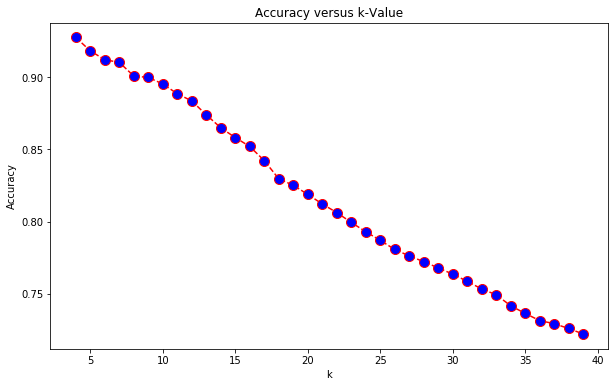

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(4,40), acc,  color = 'red', linestyle = 'dashed', 
        marker = 'o', markerfacecolor = 'blue', markersize = 10)

plt.title('Accuracy versus k-Value')
plt.xlabel('k')
plt.ylabel('Accuracy')

This analysis has shown that k = 4 is sufficient. Let's use that.

In [37]:
#predict with k = 4
k = 4
knn = neighbors.KNeighborsClassifier(n_neighbors = k)
knn = knn.fit(X_train_norm, y_train)

#save scores in variable
knn_scores_train = knn.score(X_train_norm, y_train)
knn_scores_test= knn.score(X_test_norm, y_test)

In [38]:
print('Train Score: ', knn_scores_train)
print('Test Score: ', knn_scores_test)

Train Score:  0.9687837276878373
Test Score:  0.927610825170181


# 3. Comparison of the Models

In the next step, I will visiualize the results

In [39]:
#assign results from the models to a variable each
forest_predict = forest.score(X_test, y_test)
tree_predict = tree.score(X_test, y_test)
svm_predict = svm_rbf.score(X_test_std, y_test)
xgb_predict = xgb.score(X_test,y_test)
knn_predict = knn.score(X_test_norm, y_test)

In [40]:
#create a list of models and their respective scores
models_ = []
models_.append(('R.Forest', forest_predict))
models_.append(('D. Tree', tree_predict))
models_.append(('SVM', svm_predict))
models_.append(('XGB', xgb_predict))
models_.append(('KNN', knn_predict))

#evaluate each model
results = []
names = []

for name, model in models_:
    results.append(model)
    names.append(name)
    print('%s: %f' % (name, model.mean()))

R.Forest: 0.970779
D. Tree: 0.957994
SVM: 0.879628
XGB: 0.972771
KNN: 0.927611


Now, I'll create a boxplot.

In [41]:
#transform model names to numericals
names2 = np.arange(len(names))

<Figure size 1152x648 with 0 Axes>

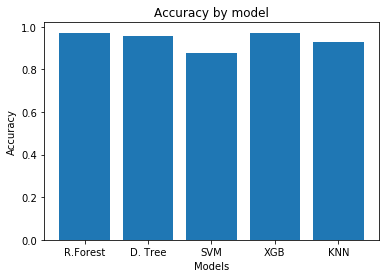

<Figure size 1152x648 with 0 Axes>

In [42]:
#create barplot with names on x-axis and accuracy (scores) on y-axis
plt.xticks(names2, names)
plt.bar(names2, results)
plt.title("Accuracy by model")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.figure(figsize=(16,9))


### Classification Report
All models performed quite well. The best one is the XGBoost classifier. Find below the classification report of this model

In [43]:
from sklearn.metrics import classification_report

pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       759
         1.0       0.98      0.97      0.98       389
         2.0       0.97      0.97      0.97       198
         3.0       0.98      0.98      0.98        59
         4.0       0.97      0.97      0.97      1130
         5.0       0.97      0.96      0.96       664
         6.0       0.97      0.97      0.97        98
         7.0       0.99      0.98      0.98       791
         8.0       0.96      0.98      0.97       966
         9.0       1.00      0.97      0.99        40
        10.0       0.90      0.90      0.90        10
        11.0       0.94      1.00      0.97        29
        12.0       0.96      0.94      0.95        82
        13.0       0.96      0.96      0.96       214
        14.0       0.96      0.95      0.95       330
        15.0       0.95      0.96      0.96       219
        16.0       0.98      0.98      0.98        45

    accuracy              

This is the end of the project. It was quite interesting to deal with these algorithms on my own and see the challenges that data scientist face. Most of the time was consumed by figuring out how to prepare the data. The training of the algorithms itself was quite straightforward. 

In future projects, I will definately take more time to analyse and prepare the data.

# The End